In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [114]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [115]:
df['age'] = df['Rings'] + 1.5

In [116]:
df.drop('Rings', axis=1)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [117]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [118]:
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
categorical_features = ['Sex']
features = numerical_features + categorical_features
target_variable = ['age']

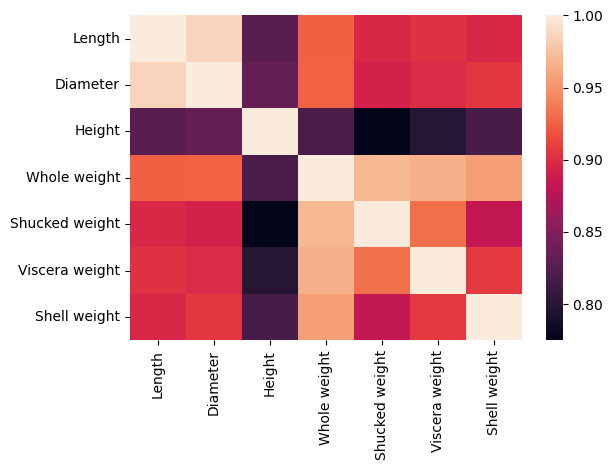

In [119]:
sns.heatmap(df[numerical_features].corr())
plt.tight_layout()
plt.show()

In [120]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [121]:
train_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
666,2,0.455,0.350,0.120,0.4835,0.1815,0.1440,0.1600,11,12.5
2813,1,0.255,0.195,0.055,0.0725,0.0285,0.0170,0.0210,4,5.5
1862,1,0.520,0.410,0.110,0.5185,0.2165,0.0915,0.1840,8,9.5
3684,1,0.620,0.470,0.155,0.9660,0.4470,0.1710,0.2840,11,12.5
551,1,0.615,0.490,0.155,0.9885,0.4145,0.1950,0.3450,13,14.5
...,...,...,...,...,...,...,...,...,...,...
2895,1,0.540,0.415,0.110,0.6190,0.2755,0.1500,0.1765,10,11.5
2763,1,0.550,0.425,0.135,0.6560,0.2570,0.1700,0.2030,10,11.5
905,1,0.320,0.240,0.090,0.1575,0.0700,0.0265,0.0425,5,6.5
3980,0,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7,8.5


<Axes: ylabel='Viscera weight'>

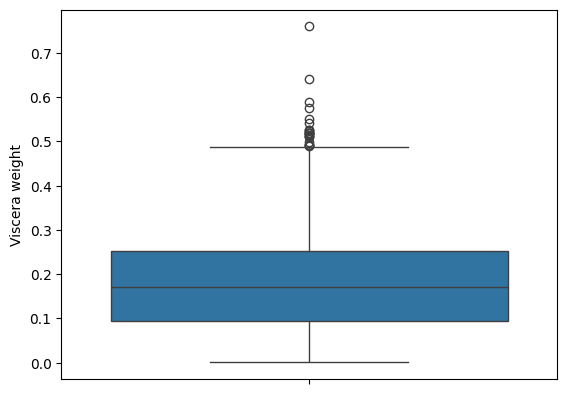

In [122]:
sns.boxplot(train_data['Viscera weight'])

In [123]:
viscera_idx = train_data.loc[train_data['Viscera weight'] > 0.6].index
train_data.drop(viscera_idx, inplace=True)

<Axes: ylabel='Height'>

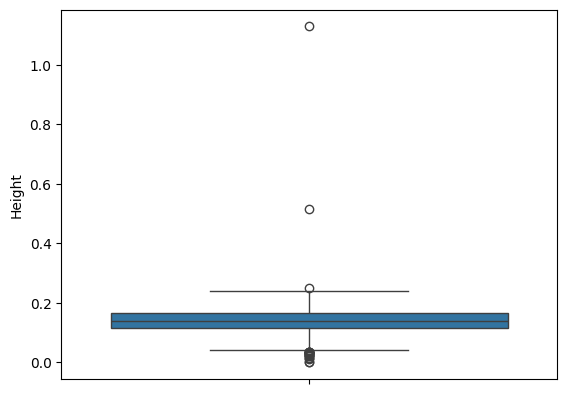

In [124]:
sns.boxplot(train_data['Height'])

In [125]:
height_idx = train_data.loc[train_data['Height']>0.4].index
train_data.drop(height_idx, inplace=True)

In [126]:
train_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
666,2,0.455,0.350,0.120,0.4835,0.1815,0.1440,0.1600,11,12.5
2813,1,0.255,0.195,0.055,0.0725,0.0285,0.0170,0.0210,4,5.5
1862,1,0.520,0.410,0.110,0.5185,0.2165,0.0915,0.1840,8,9.5
3684,1,0.620,0.470,0.155,0.9660,0.4470,0.1710,0.2840,11,12.5
551,1,0.615,0.490,0.155,0.9885,0.4145,0.1950,0.3450,13,14.5
...,...,...,...,...,...,...,...,...,...,...
2895,1,0.540,0.415,0.110,0.6190,0.2755,0.1500,0.1765,10,11.5
2763,1,0.550,0.425,0.135,0.6560,0.2570,0.1700,0.2030,10,11.5
905,1,0.320,0.240,0.090,0.1575,0.0700,0.0265,0.0425,5,6.5
3980,0,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7,8.5


<Axes: ylabel='age'>

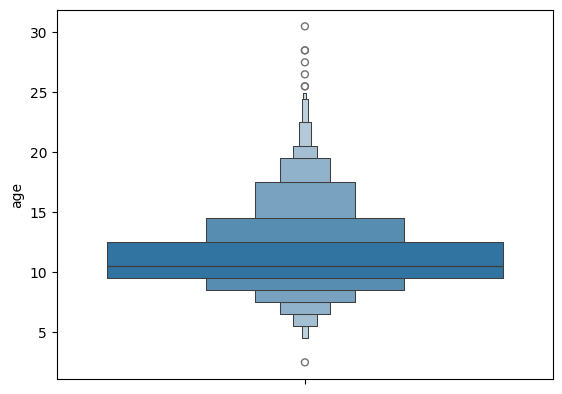

In [127]:
sns.boxenplot(train_data['age'])

In [128]:
age_idx = train_data.loc[train_data['age'] > 25].index
train_data.drop(age_idx, inplace=True)

In [129]:
X_train, y_train, X_test, y_test = train_data[features], train_data[target_variable], test_data[features], test_data[target_variable]

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3330, 8), (836, 8), (3330, 1), (836, 1))

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
train_error = mean_squared_error(y_train, linear_regression_model.predict(X_train))
test_error = mean_squared_error(y_test, linear_regression_model.predict(X_test))
print(f"Train Mean Squared Error: {train_error}")
print(f"Test Mean Squared Error: {test_error}")

Train Mean Squared Error: 4.667032469508048
Test Mean Squared Error: 4.853874302937308


In [132]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
666,0.455,0.350,0.120,0.4835,0.1815,0.1440,0.1600,2
2813,0.255,0.195,0.055,0.0725,0.0285,0.0170,0.0210,1
1862,0.520,0.410,0.110,0.5185,0.2165,0.0915,0.1840,1
3684,0.620,0.470,0.155,0.9660,0.4470,0.1710,0.2840,1
551,0.615,0.490,0.155,0.9885,0.4145,0.1950,0.3450,1
...,...,...,...,...,...,...,...,...
2895,0.540,0.415,0.110,0.6190,0.2755,0.1500,0.1765,1
2763,0.550,0.425,0.135,0.6560,0.2570,0.1700,0.2030,1
905,0.320,0.240,0.090,0.1575,0.0700,0.0265,0.0425,1
3980,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,0


In [133]:
length = float(input("Enter length: "))
diameter = float(input("Enter dia: "))
height = float(input("Enter height: "))
weight = float(input("Enter weight: "))
shuck_weight = float(input("Enter shuck: "))
vis_weight = float(input("Enter viscera: "))
shell_weight = float(input("Enter shell: "))
sex = int(input("Enter sex(M-0, I-1, F-2): "))
sample_input = [[length, diameter, height, weight, shuck_weight, vis_weight, shell_weight, sex]]

prediction = linear_regression_model.predict(sample_input)
print(prediction)

[[8.1836943]]


C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
